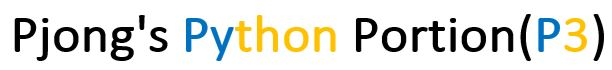

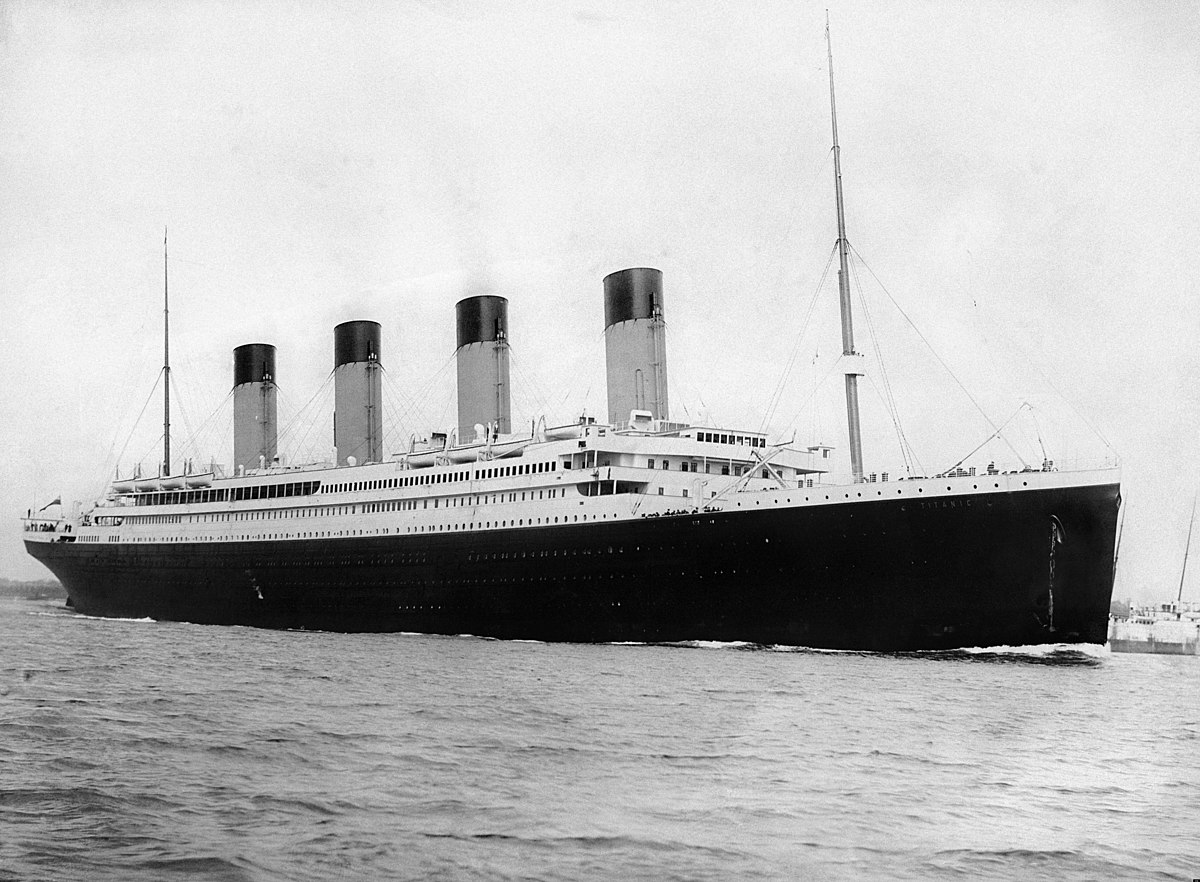

 # Revisting the Titanic

 ## Using machine learning (algorithm) to know if you would have survived the Titanic 
 ## based on your profile (a flashback prediction!) 

RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early hours of 15 April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. ~ Wikipedia 

# Data Science (Overview)

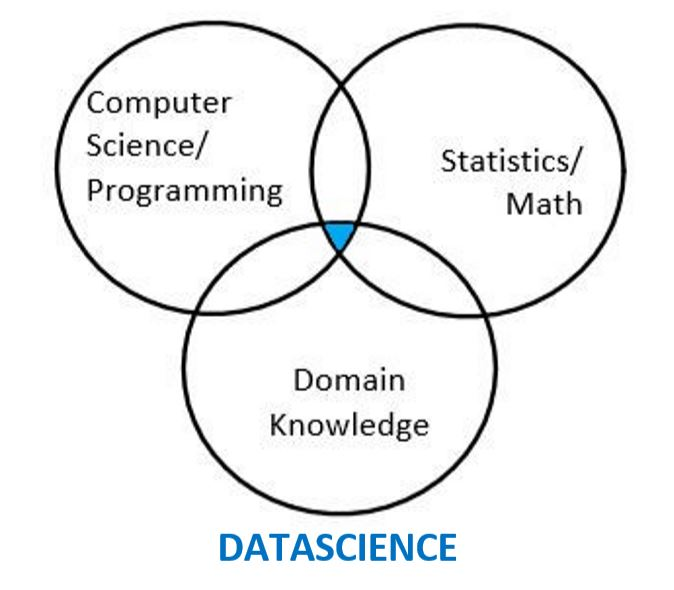

# IDE/Jupyter (Overview)

An integrated development environment (IDE) is a software application that provides comprehensive facilities to computer programmers for software development.

Windows Prompt (cmd) > 

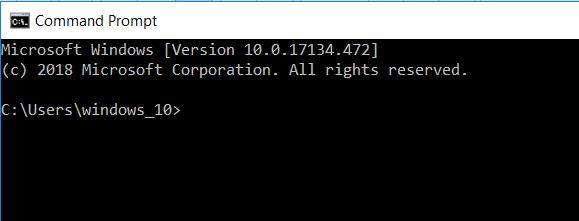

Notepad (text) > 

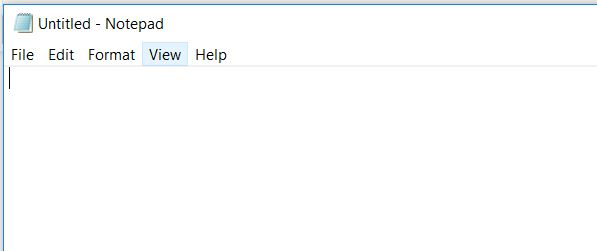

Basic IDE: Python IDLE >

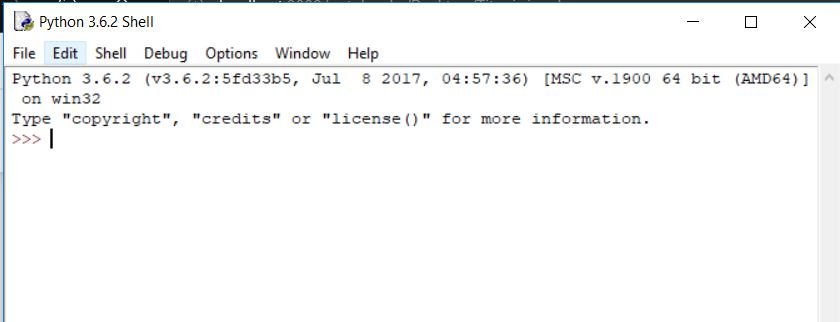

Customized IDE: Atom

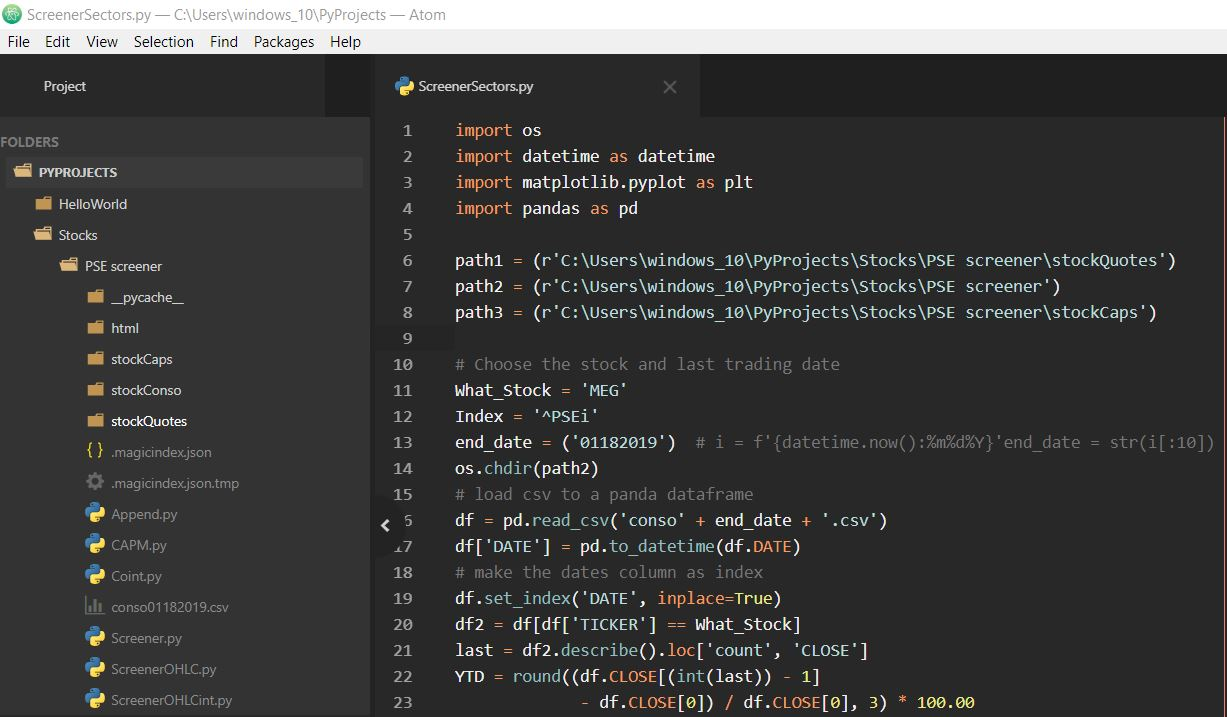

Popular Community-Developed IDE: Jupyter

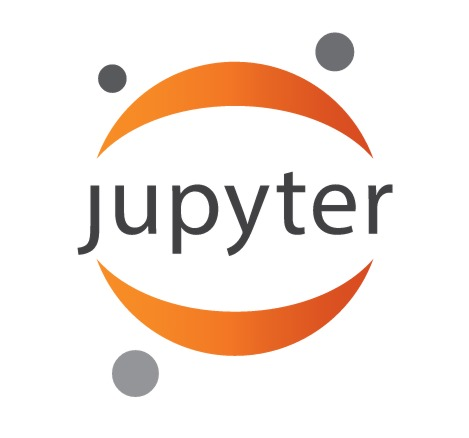

In a nutshell: Jupyter is a code editor with complete features (syntax highlighting, version control, debugging, 
visual programming, language support (Ju - Julia, Py-Python, & R). 

It is best used for training and seminars because of its easy to follow cell-by-cell coding style. It runs on most popular web browsers.

# EDA and Logistic Regression with <span style="color:#045FB4">Py</span><span style="color:#FFBF00">thon</span>  

For this lecture we will be working with the Titanic Data Set from Kaggle (A data science community website). This is a very famous data set and very often is a student's first step in machine learning! We'll be trying to classify and predict - survival or deceased first for those on board and second you as our volunteer. 


## Excerpts From <span style="color:#0174DF">DataSeer</span>

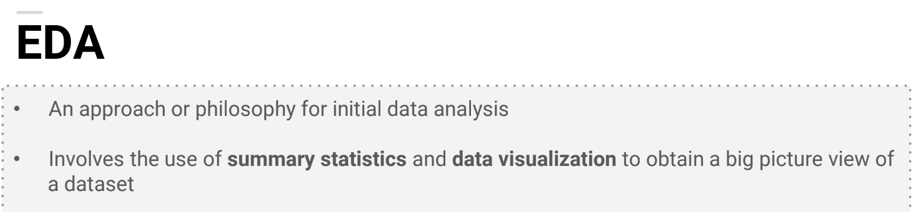

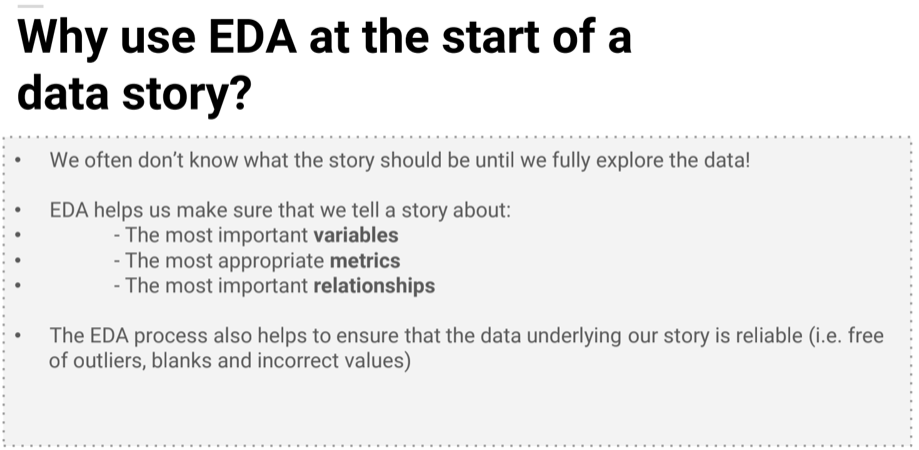

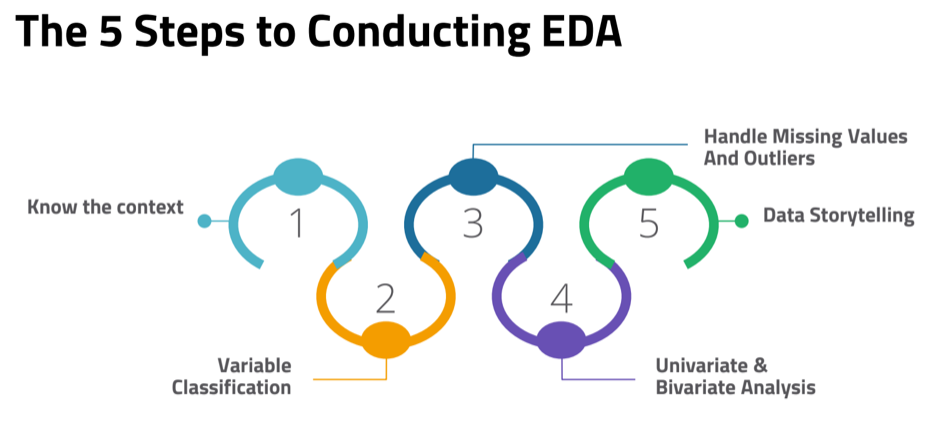

First we will do an EDA. We'll start by checking out missing data(if any)!

## Import Libraries

Let's import some libraries to prepare python for use.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Usually for Machine Learning, the data will be divided into two. 
First the 'Training' data set @ 70%
, then the 'Testing' data set @ 30%



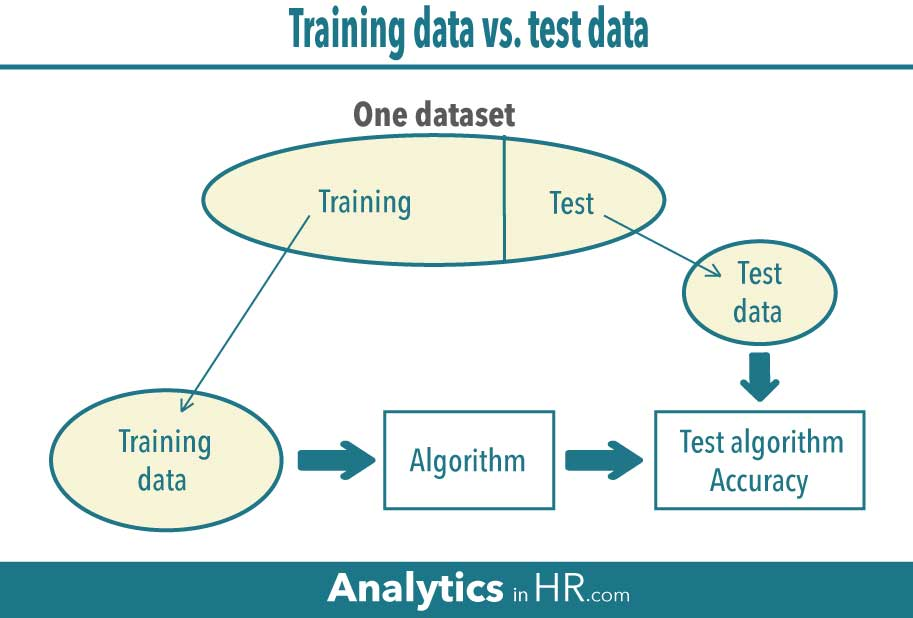

Let's start by opening the titanic data into a pandas dataframe.

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
titanic.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [5]:
titanic.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

## Exploration

Use a heatmap to find any missing values. (non-traditional)

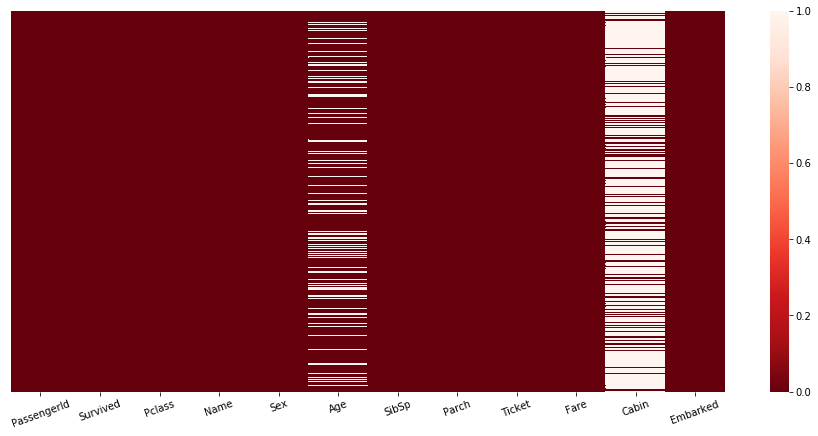

In [6]:
plt.figure(figsize=(16,7))
plt.xticks(rotation=20)
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=True,cmap='Reds_r');

Impression : 
Age 20% missing; Cabin too many missing data

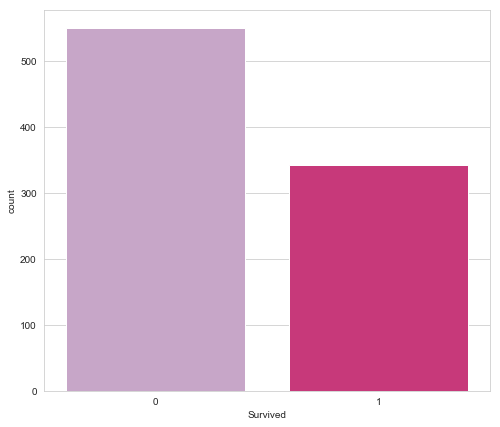

In [7]:
# How many survived compared to did not?

plt.figure(figsize=(8,7))
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic,palette='PuRd');

Impression : 0 = <span style="color:#BE81F7">Did not Survived</span>; 1 = <span style="color:#DF0174">Survived</span> ; 

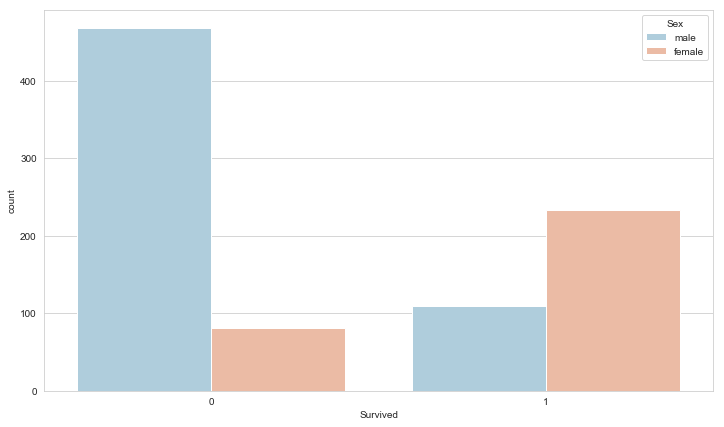

In [8]:
# Who survived more Males or Females?

plt.figure(figsize=(12,7))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='RdBu_r');

Impression: There are more who did not survived.   <span style="color:#81DAF5">?</span> passengers > <span style="color:#FAAC58">?</span> passengers

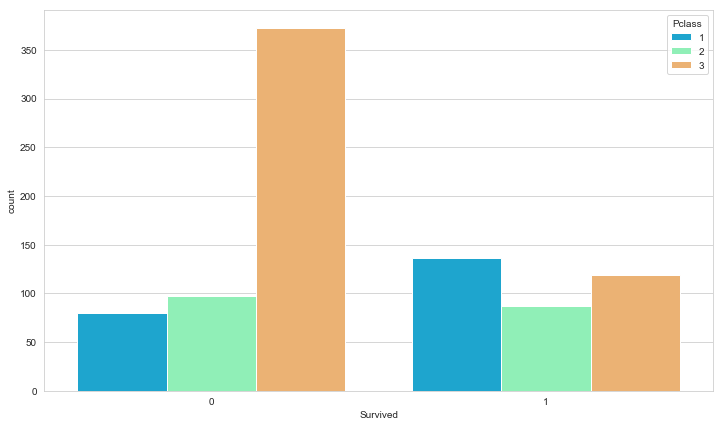

In [9]:
#Is there a surviveability distinction between Passenger Class?

plt.figure(figsize=(12,7))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='rainbow');

Impression: <span style="color:#01A9DB">? class </span> passengers survived more than the others.
<span style="color:#FAAC58">? class</span> suffered the most.

C:\Users\windows_10\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


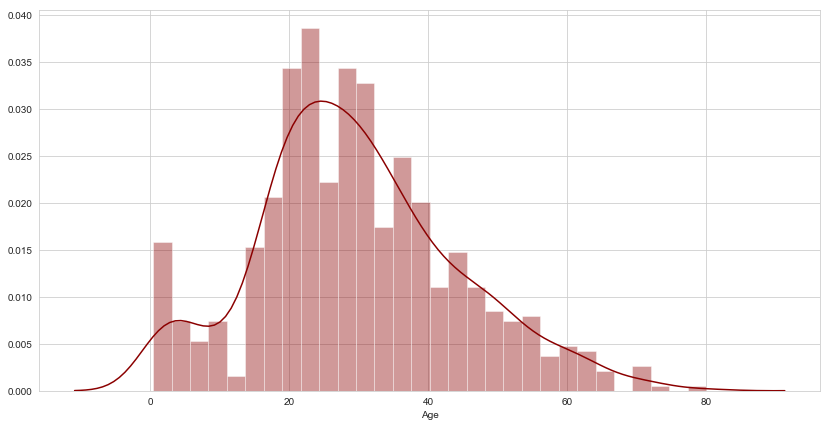

In [10]:
# Age Profile of all passengers

plt.figure(figsize=(14,7))
sns.distplot(titanic['Age'].dropna(),kde=True,color='darkred',bins=30);

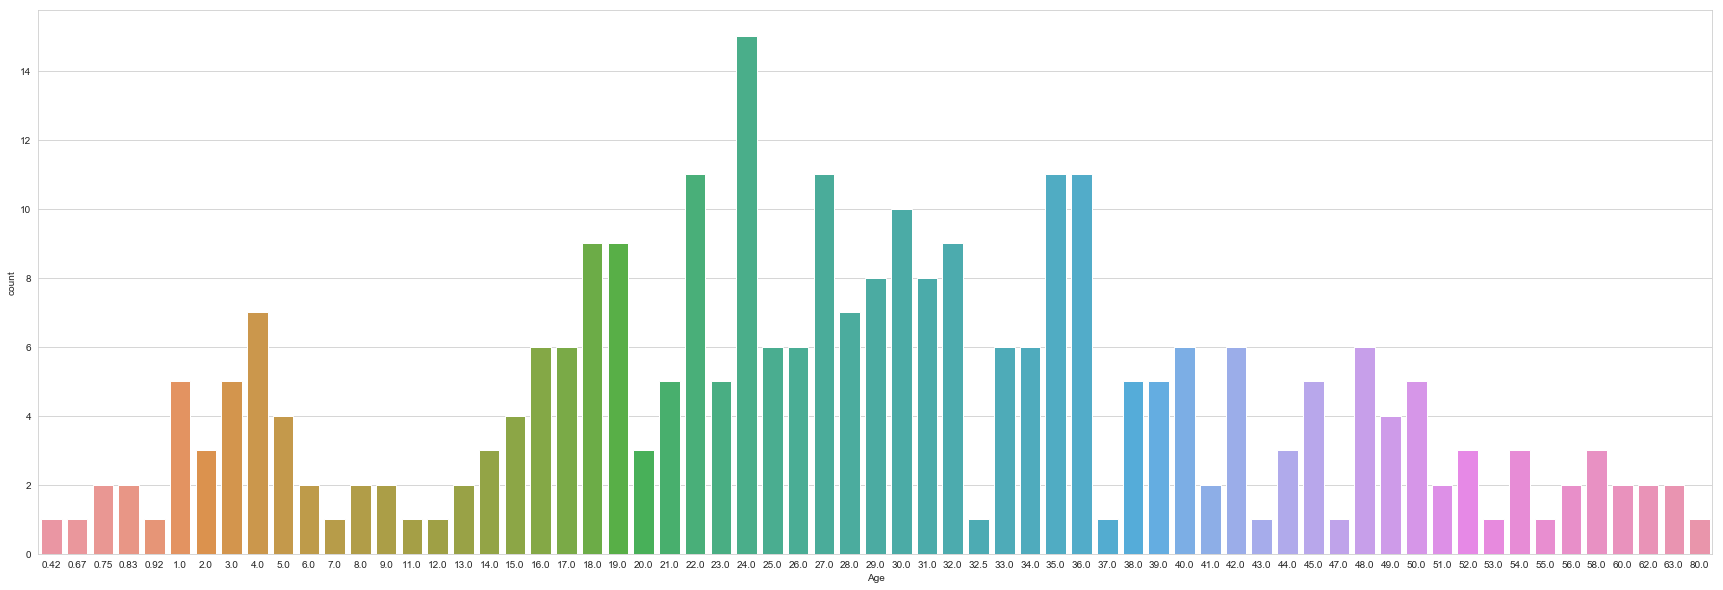

In [11]:
# Age Profile of survivors

titanicS = titanic[titanic['Survived']==1]

plt.figure(figsize=(30,10))
sns.countplot(x='Age', data=titanicS);

Impression: Most of the surviving passengers were ages between 20-30

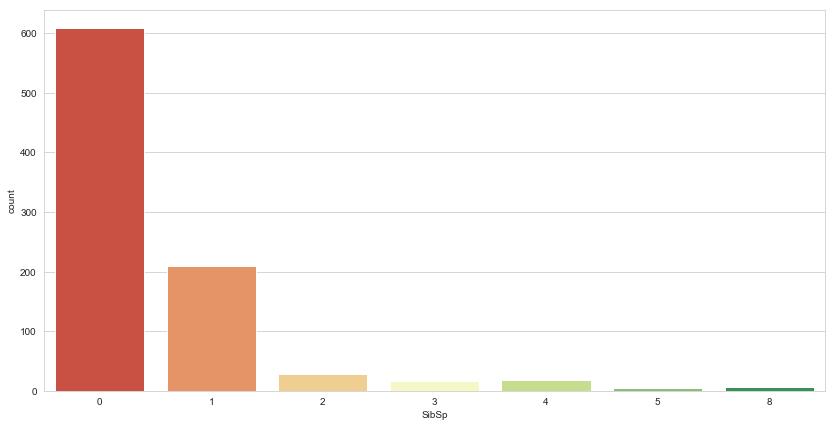

In [12]:
# Did the passengers came along with their siblings and spouses?

plt.figure(figsize=(14,7))
sns.countplot(x='SibSp',data=titanic, palette='RdYlGn');

Impression: Bulk of the passengers travelled <span style="color:#DF3A01">without</span> a sibling or spouse on board.

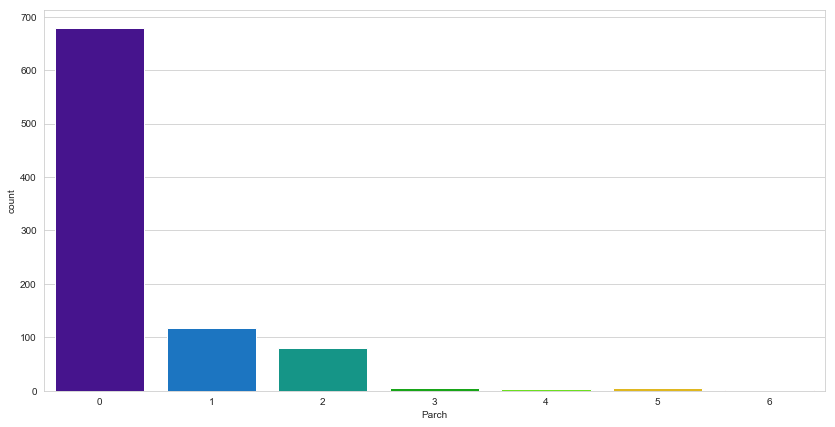

In [13]:
# Did the passengers came along with their parents or children?

plt.figure(figsize=(14,7))
sns.countplot(x='Parch',data=titanic, palette='nipy_spectral');

Impression:Bulk of the passengers travelled <span style="color:#642EFE">without</span> a parent or child on board.

In [14]:
import cufflinks as cf
cf.go_offline()

In [15]:
titanic['Fare'].iplot(kind='hist',bins=100,color='green')

Impression: Most of the passengers paid minimum (<$35) to get into the titanic.

## Data Cleanup

We want to fill in missing age data instead of just dropping it. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter and use the average age by passenger class.

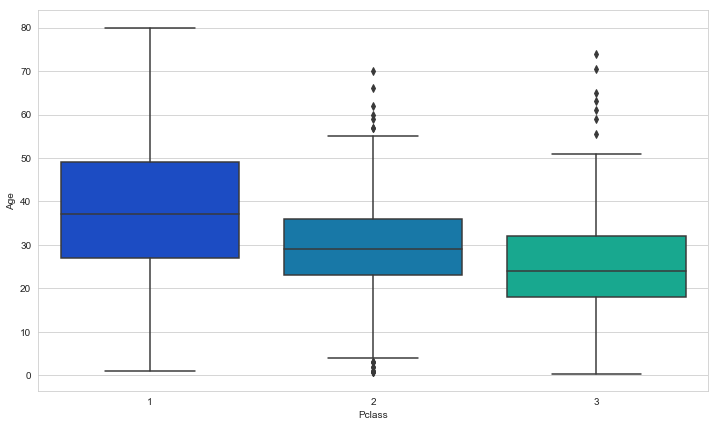

In [16]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='winter');

Impression: Who can guess?

In [17]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [18]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

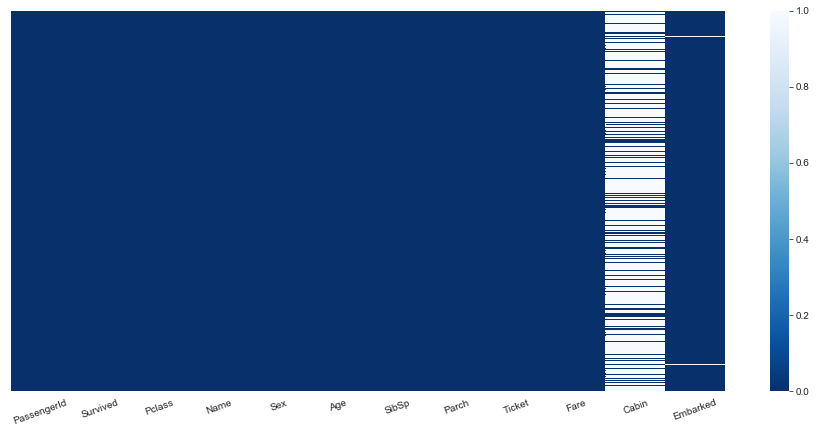

In [19]:
plt.figure(figsize=(16,7))
plt.xticks(rotation=20)
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=True,cmap='Blues_r');

Age column has been filled up!

In [20]:
titanic.drop('Cabin',axis=1,inplace=True)

In [21]:
titanic.dropna(inplace=True)

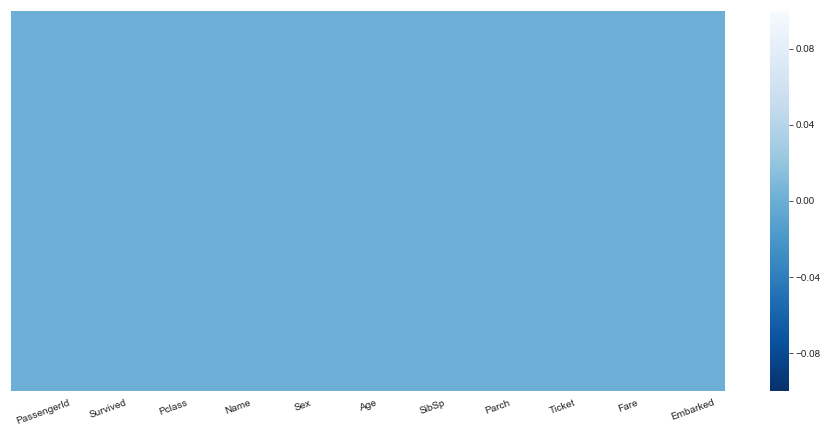

In [22]:
plt.figure(figsize=(16,7))
plt.xticks(rotation=20)
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=True,cmap='Blues_r');

In [23]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

## Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [24]:
titanic.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [25]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [26]:
titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [27]:
titanic = pd.concat([titanic,sex,embark],axis=1)

In [28]:
titanic.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0
2            3         1       3  26.0      0      0   7.9250     0  0  1
3            4         1       1  35.0      1      0  53.1000     0  0  1
4            5         0       3  35.0      0      0   8.0500     1  0  1

Great! Our data is ready for our Machine Learning model!

Let's begin our understanding of implementing Logistic Regression in Python for classification.

## Machine Learning

Computer Science > Artificial Intelligence > Machine Learning > Supervised Learning > Classification > Logistic Regression Algorithm 


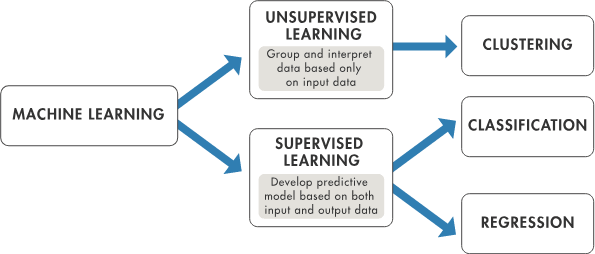

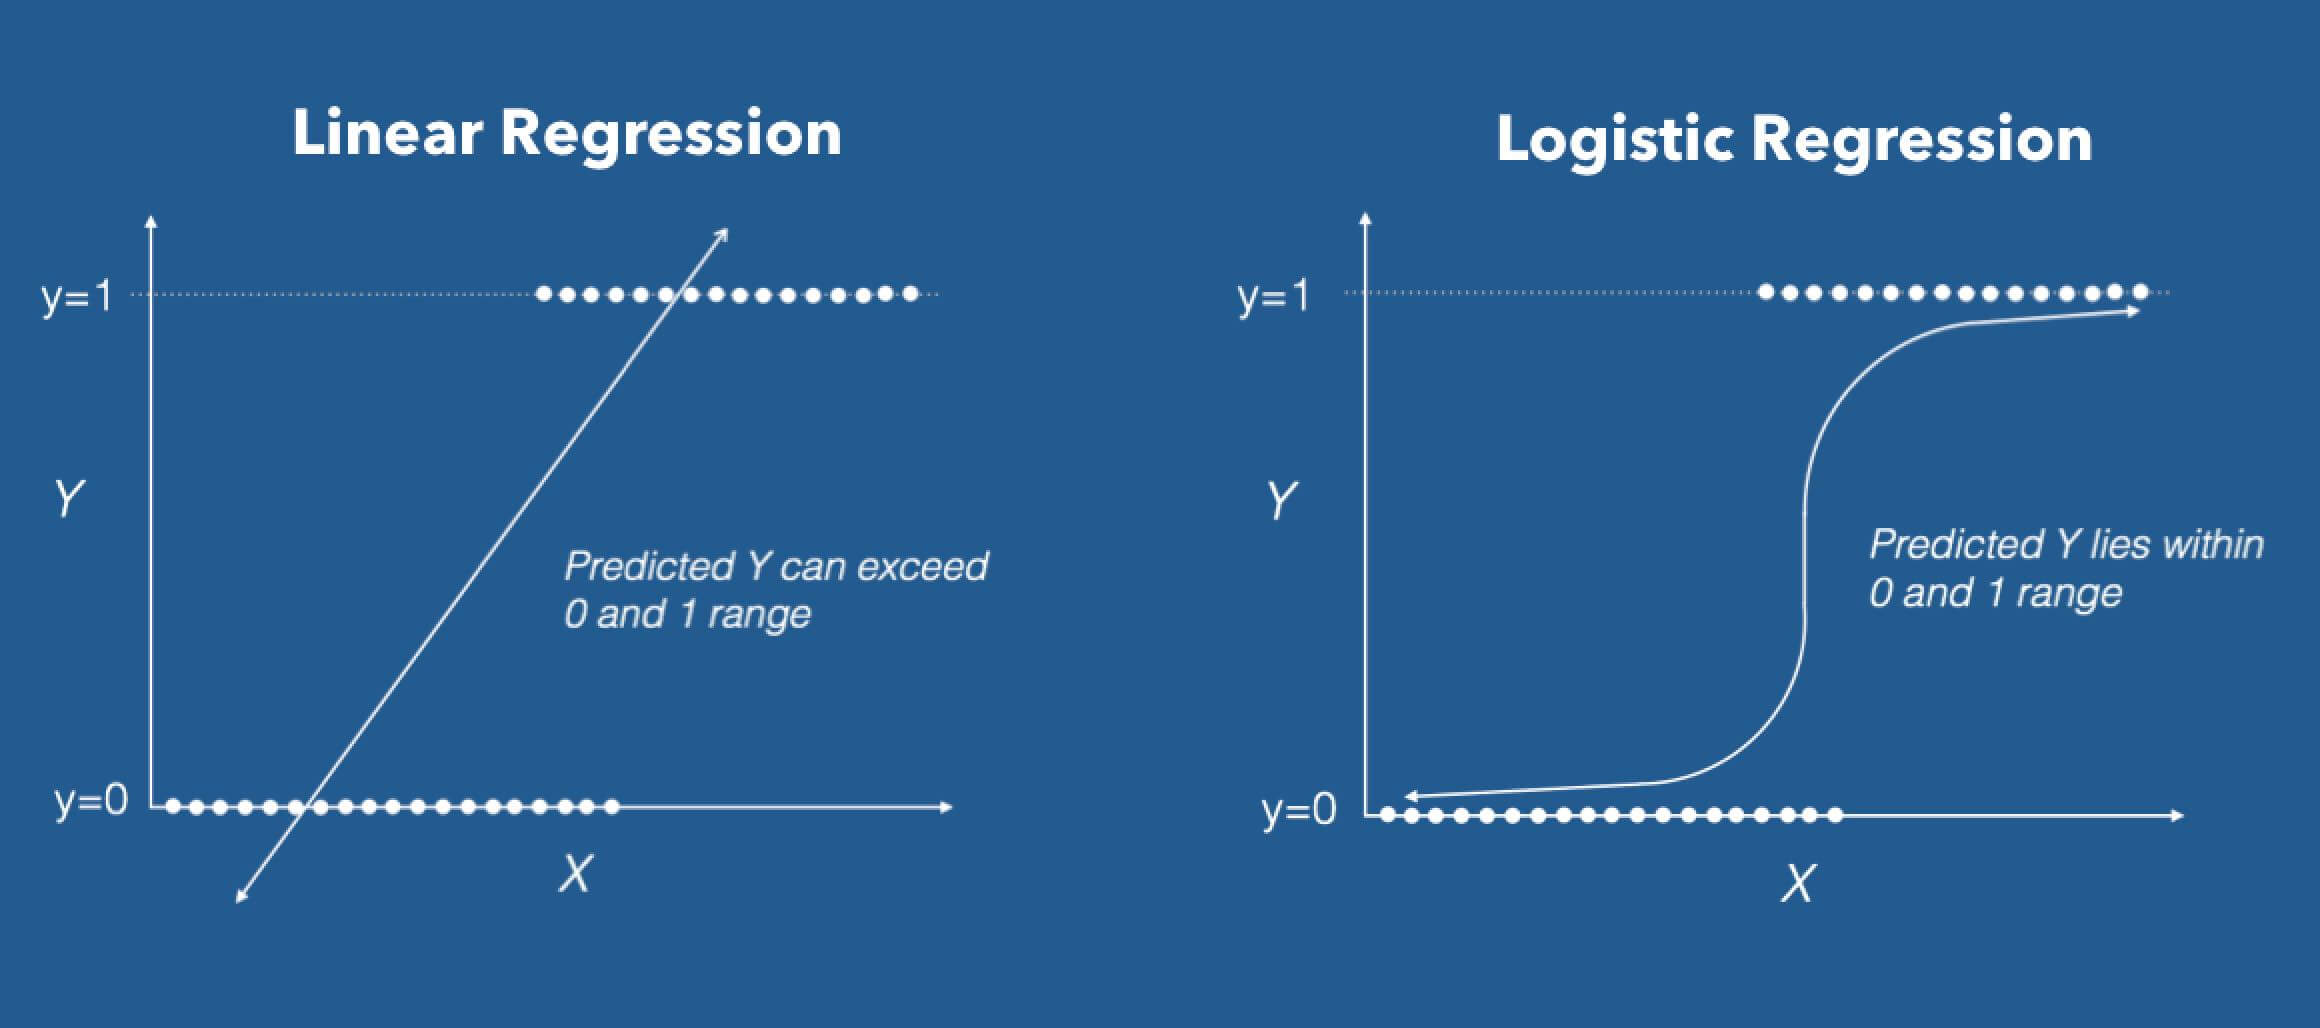

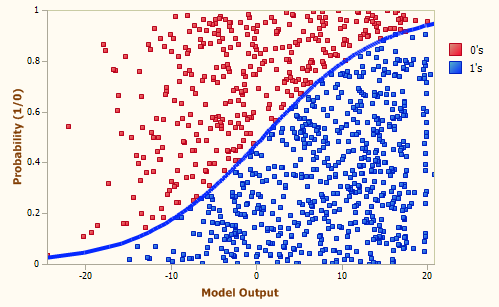

## Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1), 
                                                    titanic['Survived'], test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [31]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
LogisticRegression(solver='lbfgs');

In [32]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train);

In [33]:
predictions = logmodel.predict(X_test)
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [34]:
X_test.head(10)

PassengerId  Pclass   Age  SibSp  Parch      Fare  male  Q  S
511          512       3  24.0      0      0    8.0500     1  0  1
613          614       3  24.0      0      0    7.7500     1  1  0
615          616       2  24.0      1      2   65.0000     0  0  1
337          338       1  41.0      0      0  134.5000     0  0  0
718          719       3  24.0      0      0   15.5000     1  1  0
152          153       3  55.5      0      0    8.0500     1  0  1
826          827       3  24.0      0      0   56.4958     1  0  1
418          419       2  30.0      0      0   13.0000     1  0  1
614          615       3  35.0      0      0    8.0500     1  0  1
241          242       3  24.0      1      0   15.5000     0  1  0

## Evaluation

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



## Volunteer

NEW DATA:

1 Rich Old Lady;
2 Rich child;
3 Poor guy midtwenty;
4 CIA Volunteer

In [37]:
newX_test = pd.read_csv('newX_test.csv')

In [38]:
newX_test.head()

PassengerId  Pclass  Age  SibSp  Parch  Fare  male  Q  S
0            1       1   55      1      0   200     0  1  0
1            2       1    5      0      2   200     0  1  0
2            3       3   24      0      0    20     1  0  1
3            4       2   26      0      0   100     0  1  0

In [39]:
newy_test = pd.read_csv('newy_test.csv')

In [40]:
newy_test.head()

Survived
0         1
1         1
2         0
3         0

In [41]:
predictions = logmodel.predict(newX_test)
predictions

array([1, 1, 0, 1], dtype=int64)

In [42]:
print(classification_report(newy_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

   micro avg       0.75      0.75      0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



Further studies:
>Consider the Titles in the Name
>Consider the port from where they boarded
>If you can research on the cabin location and how the ship broke

Use logistic regression (machine learning algorithm) to other domains:
>Credit: will this person default or not? based on his/her income, debt balance, paying pattern, lifestyle
>Finance: advertising budget, spend more on newspaper, radio, tv or the internet?
>Health: Is this person diabetic or not based on his/her iris pattern
>Internet: Spam or Ham?
>Stock Sentiment: Buy or Sell or Hold?